In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from torch import nn
from torch.nn import functional as F

In [157]:
# self attention
class self_attention(nn.Module):
    '''
    Module to apply self attention to an input sequence of vectors
    
    parameters:
    
    emb_dim = dimension of the embedding vector
    h = number of self attention heads
    
    '''
    def __init__(self, emb_dim, h):
        super().__init__()
        self.emb_dim = emb_dim
        self.h = h
        self.red_vec_size = emb_dim//h
        
        # Querry vector
        self.WQ = nn.Linear(emb_dim, self.red_vec_size, bias = False)
        self.WK = nn.Linear(emb_dim, self.red_vec_size, bias = False)
        self.WV = nn.Linear(emb_dim, self.red_vec_size, bias = False)
        
    def forward(self, x):
        # x has shape (batch_size, seq_len, emb_dim)
        batch_size = x.shape[0]
        seq_len = x.shape[1]
        querries = self.WQ(x)
        keys = self.WK(x)
        values = self.WV(x)
        att_scores = F.softmax(querries@keys.permute(0,2,1) \
                               /np.sqrt(self.red_vec_size), dim = 2)
        ctx_vecs = att_scores @ values 
        assert ctx_vecs.shape == (batch_size, seq_len, self.red_vec_size ) 
        return querries, keys, values, att_scores, ctx_vecs

In [172]:
batch_size = 5
seq_len = 3
emb_dim = 4
h = 1
x = torch.randn((batch_size, seq_len, emb_dim))
attn = self_attention(emb_dim, h)

In [173]:
attn

self_attention(
  (WQ): Linear(in_features=4, out_features=4, bias=False)
  (WK): Linear(in_features=4, out_features=4, bias=False)
  (WV): Linear(in_features=4, out_features=4, bias=False)
)

In [174]:
q , k, v, s, c = attn(x)

In [175]:
q.shape, k.shape, v.shape, s.shape, c.shape

(torch.Size([5, 3, 4]),
 torch.Size([5, 3, 4]),
 torch.Size([5, 3, 4]),
 torch.Size([5, 3, 3]),
 torch.Size([5, 3, 4]))

In [182]:
q1 = q[0,0]
keys = k[0]
values = v[0]
ctx_vecs = c[0]

In [183]:
q1

tensor([-0.6311,  0.8655, -0.6542,  0.8358], grad_fn=<SelectBackward>)

In [184]:
keys

tensor([[-0.9810,  0.0888,  1.2204,  0.2591],
        [-0.5531, -0.0441,  0.8234,  0.0949],
        [ 0.2831,  0.3775, -0.8896,  0.3015]], grad_fn=<SelectBackward>)

In [185]:
keys.shape

torch.Size([3, 4])

In [186]:
q1@keys.T

tensor([ 0.1142, -0.1486,  0.9820], grad_fn=<SqueezeBackward3>)

In [187]:
scrs = F.softmax(q1@keys.T/np.sqrt(4), dim = 0)
scrs

tensor([0.2924, 0.2564, 0.4512], grad_fn=<SoftmaxBackward>)

In [188]:
s[0,0]

tensor([0.2924, 0.2564, 0.4512], grad_fn=<SelectBackward>)

In [189]:
F.softmax(q@k.permute(0,2,1) /np.sqrt(4), dim = 2)

tensor([[[0.2924, 0.2564, 0.4512],
         [0.3046, 0.2838, 0.4116],
         [0.2343, 0.2961, 0.4696]],

        [[0.4613, 0.2667, 0.2720],
         [0.4006, 0.2337, 0.3658],
         [0.3506, 0.3719, 0.2775]],

        [[0.3710, 0.1780, 0.4511],
         [0.3469, 0.2786, 0.3746],
         [0.3605, 0.3517, 0.2878]],

        [[0.5035, 0.3705, 0.1260],
         [0.2137, 0.3649, 0.4215],
         [0.4223, 0.2059, 0.3717]],

        [[0.3654, 0.1255, 0.5091],
         [0.3464, 0.3612, 0.2925],
         [0.3637, 0.3061, 0.3302]]], grad_fn=<SoftmaxBackward>)

In [190]:
scrs.sum()

tensor(1., grad_fn=<SumBackward0>)

In [191]:
scrs@v[0]

tensor([ 0.0245,  0.2283,  0.1212, -0.0549], grad_fn=<SqueezeBackward3>)

In [192]:
c[0]

tensor([[ 0.0245,  0.2283,  0.1212, -0.0549],
        [-0.0014,  0.2885,  0.2080, -0.1357],
        [ 0.0480,  0.1839,  0.0513,  0.0027]], grad_fn=<SelectBackward>)

In [194]:
attn(x)[4]

tensor([[[ 0.0245,  0.2283,  0.1212, -0.0549],
         [-0.0014,  0.2885,  0.2080, -0.1357],
         [ 0.0480,  0.1839,  0.0513,  0.0027]],

        [[ 0.3760, -0.3855, -0.8556,  0.4556],
         [ 0.3390, -0.3638, -0.7825,  0.4329],
         [ 0.3513, -0.3098, -0.7639,  0.3911]],

        [[-0.0245,  0.0642,  0.0446,  0.1075],
         [-0.0181,  0.1347,  0.0906,  0.0428],
         [ 0.0565,  0.2402,  0.0605,  0.0106]],

        [[-0.0197,  0.5554,  0.4535, -0.4049],
         [ 0.0146,  0.2928,  0.2264, -0.3642],
         [-0.1527,  0.4471,  0.5880, -0.5725]],

        [[ 0.0635,  0.2675,  0.0897,  0.0344],
         [ 0.0517,  0.4614,  0.2783, -0.2542],
         [ 0.0629,  0.4318,  0.2335, -0.1895]]], grad_fn=<UnsafeViewBackward>)

In [213]:
class multi_head_attn(nn.Module):
    '''
    Module to create multiple attention heads
    
    parameters:
    
    emb_dim = dimension of the embedding vectors
    h = number of attention heads
    parallelize = parallelize the computations for differnt heads 
    
    '''
    def __init__(self, emb_dim, h, p_drop = 0.1, parallelize = 'False'):
        super().__init__()
        self.emb_dim = emb_dim
        self.h = h
        self.red_vec_size = emb_dim // h 
        
        self.heads = [self_attention(emb_dim, h) for i in range(h)]
        
        # transform the contatenated context vectors to have same size as emb_sim
        # this is to be able to enable implement a skip-connection between the input and output
        self.Wo = nn.Linear(self.red_vec_size*h, emb_dim, bias = False) 
        
        # layer norm
        # should we apply 
        self.LNorm = nn.LayerNorm(emb_dim)
        
        self.drop = nn.Dropout(p_drop)
        
    def forward(self, x):
        ctx_vecs = torch.cat([head(x)[4] for head in self.heads], dim = 2)
        transformed = self.drop(self.Wo(ctx_vecs))
        
        return self.LNorm(x + transformed)

In [214]:
batch_size = 5
seq_len = 3
emb_dim = 6
h = 2
x = torch.randn((batch_size, seq_len, emb_dim))
multihead = multi_head_attn(emb_dim, h)

In [215]:
ctx = multihead(x)

In [216]:
ctx.shape

torch.Size([5, 3, 6])

In [217]:
ctx

tensor([[[ 1.0231, -1.9662,  0.3008, -0.1364, -0.1915,  0.9702],
         [ 0.4701,  1.9460, -0.8554, -0.4478, -0.0873, -1.0257],
         [ 1.0534, -1.7376, -0.5520,  1.0203, -0.3930,  0.6089]],

        [[ 0.5825, -0.5098, -1.1385,  0.1325, -0.8846,  1.8178],
         [-1.4548,  1.3502,  0.7119, -1.0193, -0.2577,  0.6696],
         [-0.4788,  0.5429, -0.1157, -0.6507, -1.1968,  1.8992]],

        [[ 1.2525, -1.1593, -1.4113,  1.0233,  0.0978,  0.1970],
         [-0.3135, -0.4095, -1.3153, -0.4397,  1.8473,  0.6308],
         [ 1.2602, -0.6129, -1.1350,  0.8786,  0.7792, -1.1700]],

        [[ 1.3845, -0.5001,  0.3169,  1.0697, -1.0645, -1.2064],
         [-0.1231, -1.0529,  1.7497,  0.0922, -1.2230,  0.5570],
         [ 0.8774, -0.9101, -1.7569,  0.6996,  0.8852,  0.2048]],

        [[-0.7497,  1.6234,  1.0140, -1.2375, -0.2001, -0.4502],
         [-0.7554,  1.3924,  0.1645,  0.8395,  0.0197, -1.6608],
         [-1.3110, -0.0224, -0.8433, -0.2656,  1.7294,  0.7128]]],
       grad_fn=

In [15]:
multihead

multi_head_attn(
  (Wo): Linear(in_features=6, out_features=6, bias=False)
  (LNorm): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
)

In [16]:
list(multihead.LNorm.parameters())

[Parameter containing:
 tensor([1., 1., 1., 1., 1., 1.], requires_grad=True), Parameter containing:
 tensor([0., 0., 0., 0., 0., 0.], requires_grad=True)]

In [17]:
ctx.mean(dim = 2)

tensor([[ 0.0000e+00,  9.3132e-09, -9.9341e-09],
        [ 0.0000e+00, -9.9341e-09,  1.9868e-08],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-2.4835e-09, -1.9868e-08, -2.9802e-08],
        [ 1.4901e-08, -5.9605e-08,  1.5895e-07]], grad_fn=<MeanBackward1>)

In [18]:
ctx.std(dim = 2)

tensor([[1.0954, 1.0954, 1.0954],
        [1.0954, 1.0954, 1.0954],
        [1.0954, 1.0954, 1.0954],
        [1.0954, 1.0954, 1.0954],
        [1.0954, 1.0954, 1.0954]], grad_fn=<StdBackward1>)

In [237]:
class encoder(nn.Module):
    '''
    The complete encoder module.
    
    parameters:
    
    emb_dim = dimension of the embedding vectors
    h = number of attention heads
    parallelize = parallelize the computations for differnt heads 
    ffn_l1_out_fts = number of out_features of 1st layer in feed forward NN. Default is 2048 a suggested in the original paper
    
    
    '''
    
    def __init__(self, emb_dim, h, parallelize = False, ffn_l1_out_fts = 2048 ):
        super().__init__()
        self.emb_dim = emb_dim
        self.h = h
        self.red_vec_size = emb_dim//h
        
        # multi_head_attention sub-layer
        self.mul_h_attn = multi_head_attn(emb_dim, h, parallelize)
        
        # feedforward sublayers
        self.l1 = nn.Linear(emb_dim, ffn_l1_out_fts)
        self.l2 = nn.Linear(ffn_l1_out_fts, emb_dim)
        
        # layer norm
        self.LNorm = nn.LayerNorm(emb_dim) 
        
    def forward(self, x):
        ctx_vecs = self.mul_h_attn(x)
        out = torch.relu(self.l1(ctx_vecs))
        out = self.l2(out)
        
        return self.LNorm(out + ctx_vecs)
            

In [238]:
batch_size = 5
seq_len = 3
emb_dim = 6
h = 2
x = torch.randn((batch_size, seq_len, emb_dim))
enc = encoder(emb_dim, h)

In [239]:
enc

encoder(
  (mul_h_attn): multi_head_attn(
    (Wo): Linear(in_features=6, out_features=6, bias=False)
    (LNorm): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
  )
  (l1): Linear(in_features=6, out_features=2048, bias=True)
  (l2): Linear(in_features=2048, out_features=6, bias=True)
  (LNorm): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
)

In [240]:
enc_out = enc(x)
enc_out

tensor([[[-6.9687e-01,  1.1758e+00,  4.8854e-01, -1.6772e+00, -2.8876e-01,
           9.9844e-01],
         [-4.4651e-01, -1.0795e+00,  4.6523e-01,  1.5397e+00, -1.2227e+00,
           7.4375e-01],
         [ 1.3129e+00, -3.8853e-02, -1.8970e+00, -2.5361e-01,  7.7553e-01,
           1.0110e-01]],

        [[ 1.5190e+00,  5.5929e-01, -7.5171e-02, -1.7903e+00,  1.6400e-01,
          -3.7685e-01],
         [-6.8455e-01,  1.2850e+00, -1.3559e+00, -4.7717e-01,  1.3423e+00,
          -1.0965e-01],
         [ 9.2127e-01, -1.7478e+00,  3.3282e-01, -2.4043e-01, -5.4344e-01,
           1.2776e+00]],

        [[ 3.9487e-01,  4.0633e-01,  1.7275e+00, -8.3675e-01, -3.1522e-01,
          -1.3767e+00],
         [-1.6847e+00,  1.3860e+00, -1.9685e-01,  8.8583e-01,  2.1781e-01,
          -6.0811e-01],
         [ 2.1647e-01, -1.4033e+00,  4.6092e-01,  6.6572e-01,  1.3197e+00,
          -1.2596e+00]],

        [[ 1.0092e+00, -4.2293e-01, -9.3803e-01, -1.9140e-01,  1.6388e+00,
          -1.0956e+00],
    

In [241]:
enc_out.shape

torch.Size([5, 3, 6])

In [242]:
x.shape

torch.Size([5, 3, 6])

In [220]:
class encoder_decoder_attention(nn.Module):
    '''
    Module to implement the encoder_decoder attention layer. 
    This is same as the self_attention layer except that it takes two input vectors: 
                 1)encoder's final output 
                 2) output from previous decoder layer
    The querries are generated from the previous decoder layer's output
    The keys and the values are generated from the encoder's output 
         
    '''
    def __init__(self, emb_dim, h):
        super().__init__()
        
        self.emb_dim = emb_dim
        self.h = h
        self.red_vec_size = emb_dim//h
        
        # Querry vector
        self.WQ = nn.Linear(emb_dim, self.red_vec_size, bias = False)
        # Key vector
        self.WK = nn.Linear(emb_dim, self.red_vec_size, bias = False)
        # Value vector
        self.WV = nn.Linear(emb_dim, self.red_vec_size, bias = False)
        
    def forward(self, enc_out, dec_out):
        # x has shape (batch_size, seq_len, emb_dim)
        batch_size = enc_out.shape[0]
        seq_len = dec_out.shape[1] 
        querries = self.WQ(dec_out)
        keys = self.WK(enc_out)
        values = self.WV(enc_out)
        att_scores = F.softmax((querries@keys.permute(0,2,1))\
                               /np.sqrt(self.red_vec_size), dim = 2)
        ctx_vecs = att_scores @ values 
        assert ctx_vecs.shape == (batch_size, seq_len, self.red_vec_size ) 
        return querries, keys, values, att_scores, ctx_vecs

In [76]:
batch_size = 5
seq_len = 4
emb_dim = 6
h = 2
enc_out = torch.randn((batch_size, seq_len, emb_dim))
dec_out = torch.randn(batch_size, seq_len, emb_dim)
enc_dec_attn = encoder_decoder_attention(emb_dim, h)
enc_dec_attn

encoder_decoder_attention(
  (WQ): Linear(in_features=6, out_features=3, bias=False)
  (WK): Linear(in_features=6, out_features=3, bias=False)
  (WV): Linear(in_features=6, out_features=3, bias=False)
)

In [77]:
q, k, v, s, c = enc_dec_attn(enc_out, dec_out)

In [78]:
q.shape, k.shape, v.shape, s.shape, c.shape

(torch.Size([5, 4, 3]),
 torch.Size([5, 4, 3]),
 torch.Size([5, 4, 3]),
 torch.Size([5, 4, 4]),
 torch.Size([5, 4, 3]))

In [79]:
q1 = q[0,0]
q1

tensor([0.1055, 1.0679, 0.7241], grad_fn=<SelectBackward>)

In [80]:
keys = k[0]
keys.shape

torch.Size([4, 3])

In [81]:
q1@keys.T

tensor([-2.2760, -0.6922, -0.5533, -0.9880], grad_fn=<SqueezeBackward3>)

In [82]:
q @ k.permute(0,2,1)

tensor([[[-2.2760, -0.6922, -0.5533, -0.9880],
         [ 0.0452, -0.1738, -0.6367,  1.0138],
         [-0.2108, -0.0797, -0.5803,  0.6809],
         [ 0.8407,  0.5261,  1.1788, -1.1274]],

        [[-0.0912,  0.8676, -0.7004, -0.8413],
         [-0.0349, -0.4209,  0.2272,  0.2838],
         [-0.2665,  1.3260, -0.7065, -0.8829],
         [-0.1835, -1.0982,  0.4689,  0.6033]],

        [[-1.6119,  0.5404, -0.3440,  0.3651],
         [-0.4196,  0.3210, -0.4347,  0.3786],
         [ 0.1711, -0.1909,  0.4034, -0.3576],
         [-0.4332,  0.1890,  0.4023, -0.3989]],

        [[-0.1977, -0.1933,  0.1216, -0.4201],
         [-0.1057, -0.7515, -0.7439,  0.2262],
         [-0.0205, -0.6539, -1.1184,  0.0809],
         [-0.3543, -0.2760,  1.5729,  0.3774]],

        [[-0.2560, -0.2947, -0.5404, -0.0393],
         [-0.3528, -0.3723,  1.6815, -0.4538],
         [ 0.5769,  0.3728,  0.1997,  0.2831],
         [ 0.1172,  0.3279,  0.6438, -0.0655]]], grad_fn=<UnsafeViewBackward>)

In [83]:
(q @ k.permute(0,2,1)).permute(0,2,1)

tensor([[[-2.2760,  0.0452, -0.2108,  0.8407],
         [-0.6922, -0.1738, -0.0797,  0.5261],
         [-0.5533, -0.6367, -0.5803,  1.1788],
         [-0.9880,  1.0138,  0.6809, -1.1274]],

        [[-0.0912, -0.0349, -0.2665, -0.1835],
         [ 0.8676, -0.4209,  1.3260, -1.0982],
         [-0.7004,  0.2272, -0.7065,  0.4689],
         [-0.8413,  0.2838, -0.8829,  0.6033]],

        [[-1.6119, -0.4196,  0.1711, -0.4332],
         [ 0.5404,  0.3210, -0.1909,  0.1890],
         [-0.3440, -0.4347,  0.4034,  0.4023],
         [ 0.3651,  0.3786, -0.3576, -0.3989]],

        [[-0.1977, -0.1057, -0.0205, -0.3543],
         [-0.1933, -0.7515, -0.6539, -0.2760],
         [ 0.1216, -0.7439, -1.1184,  1.5729],
         [-0.4201,  0.2262,  0.0809,  0.3774]],

        [[-0.2560, -0.3528,  0.5769,  0.1172],
         [-0.2947, -0.3723,  0.3728,  0.3279],
         [-0.5404,  1.6815,  0.1997,  0.6438],
         [-0.0393, -0.4538,  0.2831, -0.0655]]], grad_fn=<PermuteBackward>)

In [92]:
scores1 = F.softmax((q1@keys.T/np.sqrt(3)), dim = 0)
scores1

tensor([0.1204, 0.3005, 0.3256, 0.2534], grad_fn=<SoftmaxBackward>)

In [86]:
s[0]

tensor([[0.1204, 0.3005, 0.3256, 0.2534],
        [0.2323, 0.2047, 0.1567, 0.4063],
        [0.2193, 0.2366, 0.1772, 0.3670],
        [0.2967, 0.2474, 0.3606, 0.0952]], grad_fn=<SelectBackward>)

In [93]:
scores1.sum()

tensor(1., grad_fn=<SumBackward0>)

In [89]:
v[0]

tensor([[-0.4755,  0.7773,  2.0798],
        [ 0.1360,  0.4734,  0.2271],
        [ 0.0423, -0.0171,  1.2723],
        [-0.2565,  0.5834,  1.0827]], grad_fn=<SelectBackward>)

In [94]:
scores1 @ v[0]

tensor([-0.0676,  0.3781,  1.0074], grad_fn=<SqueezeBackward3>)

In [95]:
c[0]

tensor([[-0.0676,  0.3781,  1.0074],
        [-0.1802,  0.5118,  1.1689],
        [-0.1587,  0.4935,  1.1326],
        [-0.1166,  0.3971,  1.2352]], grad_fn=<SelectBackward>)

In [96]:
q2 = q[0,1]
q2

tensor([ 0.5455, -1.0743,  0.2637], grad_fn=<SelectBackward>)

In [98]:
scores2 = F.softmax((q2@keys.T/np.sqrt(3)), dim = 0)
scores2

tensor([0.2323, 0.2047, 0.1567, 0.4063], grad_fn=<SoftmaxBackward>)

In [99]:
scores2@v[0]

tensor([-0.1802,  0.5118,  1.1689], grad_fn=<SqueezeBackward3>)

In [100]:
qq1 = q[1,0]
keys = k[1]
scores = F.softmax((qq1@keys.T/np.sqrt(3)), dim = 0)
scores@v[1]

tensor([-0.3518,  0.0418,  0.4753], grad_fn=<SqueezeBackward3>)

In [101]:
c[1]

tensor([[-0.3518,  0.0418,  0.4753],
        [-0.4657,  0.1529,  0.5513],
        [-0.3086, -0.0077,  0.4688],
        [-0.4950,  0.1789,  0.5791]], grad_fn=<SelectBackward>)

In [206]:
class multi_head_enc_dec_attn(nn.Module):
    def __init__(self, emb_dim, h):
        super().__init__()
        self.emb_dim = emb_dim
        self.h = h
        self.red_vec_size = emb_dim // h 
        
        self.heads = [encoder_decoder_attention(emb_dim, h) for i in range(h)]
        
        # transform the contatenated context vectors to have same size as emb_sim
        # this is to be able to enable implement a skip-connection between the input and output
        self.Wo = nn.Linear(self.red_vec_size*h, emb_dim, bias = False) 
        
        # layer norm
        # should we apply 
        self.LNorm = nn.LayerNorm(emb_dim)
        
    def forward(self, enc_out, dec_out):
        ctx_vecs = torch.cat([head(enc_out, dec_out)[4] for head in self.heads], dim = 2)
        transformed = self.Wo(ctx_vecs)
        
        return self.LNorm(dec_out + transformed)

In [210]:
batch_size = 5
seq_len = 4
emb_dim = 7
h = 2
enc_out = torch.randn((batch_size, seq_len, emb_dim))
dec_out = torch.randn(batch_size, seq_len, emb_dim)
enc_dec_attn = multi_head_enc_dec_attn(emb_dim, h)
enc_dec_attn

multi_head_enc_dec_attn(
  (Wo): Linear(in_features=6, out_features=7, bias=False)
  (LNorm): LayerNorm((7,), eps=1e-05, elementwise_affine=True)
)

In [211]:
ctx = enc_dec_attn(enc_out, dec_out)

In [212]:
ctx.shape

torch.Size([5, 4, 7])

In [221]:
batch_size = 5
enc_seq_len = 4
dec_seq_len = 2
emb_dim = 7
h = 2
enc_out = torch.randn((batch_size, enc_seq_len, emb_dim))
dec_out = torch.randn(batch_size, dec_seq_len, emb_dim)
enc_dec_attn = multi_head_enc_dec_attn(emb_dim, h)
enc_dec_attn

multi_head_enc_dec_attn(
  (Wo): Linear(in_features=6, out_features=7, bias=False)
  (LNorm): LayerNorm((7,), eps=1e-05, elementwise_affine=True)
)

In [222]:
enc_dec_attn(enc_out, dec_out)

tensor([[[-1.5825,  0.2314, -0.0871,  1.1878, -0.7354,  1.4921, -0.5063],
         [ 2.1371, -0.9590, -0.0456,  0.0407,  0.4044, -0.5633, -1.0142]],

        [[-0.8367, -0.5809,  1.1473, -0.4594,  0.9021,  1.2566, -1.4290],
         [-0.6285, -0.3225, -0.0123,  0.3943, -1.7571,  1.6886,  0.6375]],

        [[-0.6189, -1.2911,  1.2547, -0.8207,  1.6273, -0.2217,  0.0704],
         [-0.5710,  0.1586,  0.0643,  2.3108, -0.6349, -0.5634, -0.7644]],

        [[ 1.3261, -0.4710,  0.2420,  0.1493,  0.0888, -2.0887,  0.7536],
         [ 0.7919, -1.4163, -1.0918,  0.2870, -0.7728,  1.2891,  0.9129]],

        [[-0.0049, -0.8477, -0.4687, -1.3792,  1.7102,  1.1053, -0.1150],
         [ 0.0845,  1.8900, -0.6647, -0.9882,  1.0307, -0.5630, -0.7893]]],
       grad_fn=<NativeLayerNormBackward>)

In [223]:
slfattn = multi_head_attn(emb_dim, h)
slfattn(dec_out)

tensor([[[-1.4787,  0.1758,  0.0812,  1.3959, -0.9545,  1.2879, -0.5076],
         [ 2.0926, -1.0435,  0.2474,  0.3530, -0.0164, -0.7385, -0.8946]],

        [[-0.7540, -0.6133,  0.9736, -0.5767,  1.1325,  1.2379, -1.3999],
         [-0.6942, -0.3792, -0.1381,  0.2258, -1.5779,  1.7958,  0.7678]],

        [[-0.8495, -1.2767,  1.4893, -0.8838,  1.2699,  0.1748,  0.0759],
         [-0.6369,  0.3687,  0.0556,  2.1963, -0.8476, -0.2022, -0.9339]],

        [[ 1.6768, -0.1492,  0.3126, -0.3615, -0.1140, -1.9057,  0.5410],
         [ 1.1211, -1.1274, -1.0408, -0.1686, -0.9393,  1.3565,  0.7985]],

        [[ 0.1336, -1.2479, -0.5530, -1.1831,  1.5362,  1.1550,  0.1590],
         [ 0.2815,  2.0475, -0.7514, -0.6693,  0.6693, -0.8974, -0.6802]]],
       grad_fn=<NativeLayerNormBackward>)

In [226]:
dec_out2 = torch.randn(batch_size, dec_seq_len+1, emb_dim)

In [227]:
slfattn(dec_out2)

tensor([[[-0.0689,  0.3102, -1.0180, -0.9410, -0.9588,  1.8263,  0.8501],
         [-1.1982,  0.4798,  0.4758, -0.9345, -0.0737, -0.6874,  1.9382],
         [ 0.0330,  0.3672,  1.9666, -0.3918,  0.0078, -0.3290, -1.6537]],

        [[ 0.1886, -0.4317,  1.8125, -1.1055,  1.0329, -0.5438, -0.9529],
         [ 0.9974,  1.1519, -1.2553, -1.2514,  0.9556, -0.7704,  0.1721],
         [ 0.0976, -0.7475, -1.5488, -0.6047,  0.1723,  1.6123,  1.0188]],

        [[ 1.8695, -1.4863, -0.1209, -0.3683, -0.7031,  0.0023,  0.8069],
         [ 0.2162,  0.0424,  2.0732, -0.7594, -0.0695, -0.0651, -1.4378],
         [-0.3043, -0.2585, -0.8746,  0.3061,  2.2664, -0.2505, -0.8847]],

        [[ 0.7157, -1.9892,  0.5818, -0.1268, -0.7911,  0.4477,  1.1619],
         [ 1.3221,  1.2725, -1.7518,  0.0332, -0.5668, -0.4657,  0.1566],
         [-1.0578,  0.5653, -0.6794, -0.9340, -0.6460,  1.4846,  1.2674]],

        [[ 0.7314, -0.5585,  0.9822, -0.5667, -1.3785, -0.7571,  1.5471],
         [-0.1461, -1.9451,  0

In [233]:
class decoder(nn.Module):
    '''
    The complete decoder module. 
    
    parameters:
    
    emb_dim = dimension of the embedding vectors
    h = number of attention heads
    parallelize = parallelize the computations for differnt heads 
    ffn_l1_out_fts = number of out_features of 1st layer in feed forward NN. Default is 2048 a suggested in the original paper
    
    '''
    def __init__(self, emb_dim, h, parallelize = False, ffn_l1_out_fts = 2048):
        super().__init__()
        
        self.emb_dim = emb_dim
        self.h = h
        self.red_vec_size = emb_dim//h
        
        # multi_head_attention sub-layer
        self.mul_h_attn = multi_head_attn(emb_dim, h, parallelize)
        
        # multi head encoder decoder attention sublayer
        self.mul_h_enc_dec_attn = multi_head_enc_dec_attn(emb_dim, h)
        
        # feedforward sublayers
        self.l1 = nn.Linear(emb_dim, ffn_l1_out_fts)
        self.l2 = nn.Linear(ffn_l1_out_fts, emb_dim)
        
        # layer norm
        self.LNorm = nn.LayerNorm(emb_dim) 
        
    def forward(self, enc_vecs, dec_vecs):
        dec_vecs = self.mul_h_attn(dec_vecs)
        ff_in = self.mul_h_enc_dec_attn(enc_vecs, dec_vecs)
        out = torch.relu(self.l1(ff_in))
        out = self.l2(out)
        
        return self.LNorm(out + ff_in)
    
    
    

In [234]:
batch_size = 5
enc_seq_len = 4
dec_seq_len = 2
emb_dim = 7
h = 2
enc_out = torch.randn((batch_size, enc_seq_len, emb_dim))
dec_out = torch.randn(batch_size, dec_seq_len, emb_dim)
dec = decoder(emb_dim, h)
dec

decoder(
  (mul_h_attn): multi_head_attn(
    (Wo): Linear(in_features=6, out_features=7, bias=False)
    (LNorm): LayerNorm((7,), eps=1e-05, elementwise_affine=True)
  )
  (mul_h_enc_dec_attn): multi_head_enc_dec_attn(
    (Wo): Linear(in_features=6, out_features=7, bias=False)
    (LNorm): LayerNorm((7,), eps=1e-05, elementwise_affine=True)
  )
  (l1): Linear(in_features=7, out_features=2048, bias=True)
  (l2): Linear(in_features=2048, out_features=7, bias=True)
  (LNorm): LayerNorm((7,), eps=1e-05, elementwise_affine=True)
)

In [235]:
dec_ot = dec(enc_out, dec_out)
dec_ot.shape

torch.Size([5, 2, 7])

In [236]:
dec_out.shape

torch.Size([5, 2, 7])

In [104]:
def positional_encoding(emb_dim, seq_len):
    posts = torch.arange(seq_len).unsqueeze(1)
    pows = 10000**(torch.arange(emb_dim//2)/float(emb_dim))
    mat = posts/pows # rows = position in the sequence , # col = index along the embedding space
    first_half = torch.sin(mat)
    second_half = torch.cos(mat)
    out = torch.cat((first_half, second_half), dim = 1)
    return out
    

In [118]:
mm = positional_encoding(512,20)

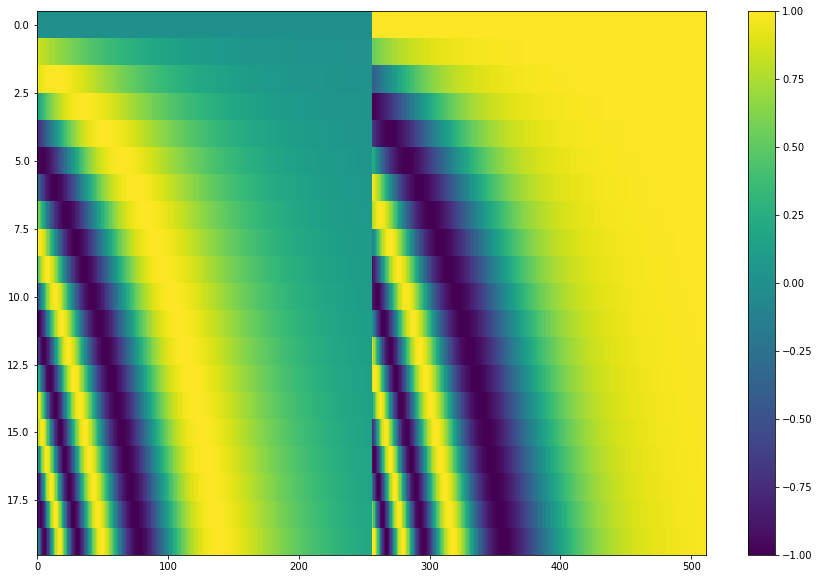

In [140]:
plt.figure(figsize = (15,10))
plt.imshow(mm.numpy(), aspect = 'auto')
plt.colorbar()
plt.show()

In [144]:
bs = 5
seq_len = 3
emb_dim = 4
arr1 = torch.randint(low =0, high = 5, size = (bs, seq_len, emb_dim))
arr1

tensor([[[2, 2, 2, 3],
         [1, 2, 3, 4],
         [3, 0, 1, 0]],

        [[2, 0, 1, 4],
         [1, 3, 2, 1],
         [0, 1, 0, 2]],

        [[1, 2, 2, 2],
         [0, 4, 0, 0],
         [2, 3, 2, 2]],

        [[4, 0, 0, 0],
         [2, 2, 1, 2],
         [4, 0, 0, 4]],

        [[2, 3, 0, 2],
         [4, 1, 3, 3],
         [4, 0, 1, 2]]])

In [145]:
arr2 = positional_encoding(emb_dim, seq_len)
arr2

tensor([[ 0.0000,  0.0000,  1.0000,  1.0000],
        [ 0.8415,  0.0998,  0.5403,  0.9950],
        [ 0.9093,  0.1987, -0.4161,  0.9801]])

In [146]:
arr1+arr2

tensor([[[ 2.0000,  2.0000,  3.0000,  4.0000],
         [ 1.8415,  2.0998,  3.5403,  4.9950],
         [ 3.9093,  0.1987,  0.5839,  0.9801]],

        [[ 2.0000,  0.0000,  2.0000,  5.0000],
         [ 1.8415,  3.0998,  2.5403,  1.9950],
         [ 0.9093,  1.1987, -0.4161,  2.9801]],

        [[ 1.0000,  2.0000,  3.0000,  3.0000],
         [ 0.8415,  4.0998,  0.5403,  0.9950],
         [ 2.9093,  3.1987,  1.5839,  2.9801]],

        [[ 4.0000,  0.0000,  1.0000,  1.0000],
         [ 2.8415,  2.0998,  1.5403,  2.9950],
         [ 4.9093,  0.1987, -0.4161,  4.9801]],

        [[ 2.0000,  3.0000,  1.0000,  3.0000],
         [ 4.8415,  1.0998,  3.5403,  3.9950],
         [ 4.9093,  0.1987,  0.5839,  2.9801]]])